In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

In [538]:
# first we import dataset

In [49]:
train_df=pd.read_excel('D:\Pgm\DataScience\Dataset\FlightTicket\Data_Train.xlsx')

In [45]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [52]:
train_df.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6772,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:55,15:15 13 Mar,16h 20m,1 stop,In-flight meal not included,11087
10272,Vistara,3/06/2019,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687
6692,Air India,3/04/2019,Mumbai,Hyderabad,BOM → HYD,21:05,22:25,1h 20m,non-stop,No info,2050
960,SpiceJet,1/06/2019,Mumbai,Hyderabad,BOM → HYD,13:15,14:45,1h 30m,non-stop,No check-in baggage included,2175
1522,Jet Airways,09/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:45 13 Mar,25h 50m,1 stop,In-flight meal not included,11087
8050,Jet Airways,24/03/2019,Kolkata,Banglore,CCU → BOM → BLR,21:10,08:10 25 Mar,11h,1 stop,In-flight meal not included,11134
1904,Jet Airways,12/04/2019,Banglore,Delhi,BLR → DEL,11:10,14:05,2h 55m,non-stop,In-flight meal not included,5198
8536,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,14:05,09:30 02 Mar,19h 25m,1 stop,No info,25735
7460,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,13:00,15:50,2h 50m,non-stop,No info,5694
8049,Air India,9/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,05:00,07:40 10 May,26h 40m,2 stops,No info,11281


In [48]:
train_df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [541]:
train_df.shape

(10683, 11)

In [542]:
test_df= pd.read_excel('D:\Pgm\DataScience\Dataset\FlightTicket\Test_set.xlsx')

In [543]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [544]:
test_df.shape

(2671, 10)

In [545]:
final_df=pd.concat([train_df,test_df],ignore_index=True)

In [546]:
final_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [547]:
final_df.shape

(13354, 11)

In [548]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [549]:
# first finding and handling of null values

In [550]:
final_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64


So there is 1 null value in Route and 1 null value in Total stops


In [551]:
final_df['Route'].mode()[0]

'DEL → BOM → COK'

In [552]:
final_df[final_df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [553]:
final_df1= final_df.copy()

In [554]:
final_df1['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
13349          CCU → DEL → BLR
13350                CCU → BLR
13351          DEL → BOM → COK
13352          DEL → BOM → COK
13353          DEL → BOM → COK
Name: Route, Length: 13354, dtype: object

In [555]:
final_df1['Route'].mode()

0    DEL → BOM → COK
Name: Route, dtype: object

In [556]:
final_df1['Route'].fillna(final_df1['Route'].mode()[0],inplace=True)

In [557]:
final_df1.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [558]:
final_df1.iloc[9039]

Airline                  Air India
Date_of_Journey          6/05/2019
Source                       Delhi
Destination                 Cochin
Route              DEL → BOM → COK
Dep_Time                     09:45
Arrival_Time          09:25 07 May
Duration                   23h 40m
Total_Stops                    NaN
Additional_Info            No info
Price                       7480.0
Name: 9039, dtype: object

In [559]:
final_df1['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [560]:
final_df1['Total_Stops'].value_counts()

Total_Stops
1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: count, dtype: int64

In [561]:
final_df1['Total_Stops'].mode()[0]

'1 stop'

In [562]:
final_df1['Total_Stops'].fillna(final_df1['Total_Stops'].mode()[0],inplace=True)

In [563]:
final_df1.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dtype: int64

In [564]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13354 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13354 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [565]:
final_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [566]:
# so we analyse now each columns one by one

In [567]:
final_df1['Airline'].unique()


array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [568]:
top_five_flights=final_df.groupby('Airline').size().reset_index().rename(columns={0:"No of Flights"}).sort_values("No of Flights",ascending=False)[0:5]
top_five_flights

,Airline,No of Flights
4,Jet Airways,4746
3,IndiGo,2564
1,Air India,2192
6,Multiple carriers,1543
8,SpiceJet,1026


In [569]:
# if we want its graphical representation

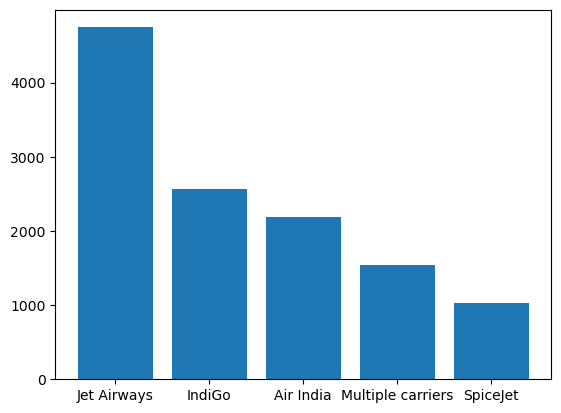

In [570]:
# so we can see that top 5 flights in terms of number
plt.bar(top_five_flights['Airline'],top_five_flights['No of Flights'],)
plt.show()

In [571]:
final_df1['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [572]:
# Now we split datatime to get varition of price with respect to each day or month wise

In [573]:
final_df1['Date_of_Journey'].str.split('/')

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
13349     [6, 06, 2019]
13350    [27, 03, 2019]
13351     [6, 03, 2019]
13352     [6, 03, 2019]
13353    [15, 06, 2019]
Name: Date_of_Journey, Length: 13354, dtype: object

In [574]:
final_df1['Day']=final_df1['Date_of_Journey'].str.split('/').str[0]
final_df1['Month']=final_df1['Date_of_Journey'].str.split('/').str[1]
final_df1['Year']=final_df1['Date_of_Journey'].str.split('/').str[2]

In [575]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13354 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13354 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Day              13354 non-null  object 
 12  Month            13354 non-null  object 
 13  Year             13354 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.4+ MB


In [576]:
final_df1['Day']=final_df1['Day'].astype('int')
final_df1['Month']=final_df1['Month'].astype('int')
final_df1['Year']=final_df1['Year'].astype('int')

In [577]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13354 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13354 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Day              13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.3+ MB


In [578]:
final_df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [579]:
# now we will drop orinal column

In [580]:
final_df1.drop('Date_of_Journey',axis=1,inplace=True)

In [581]:
final_df1.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

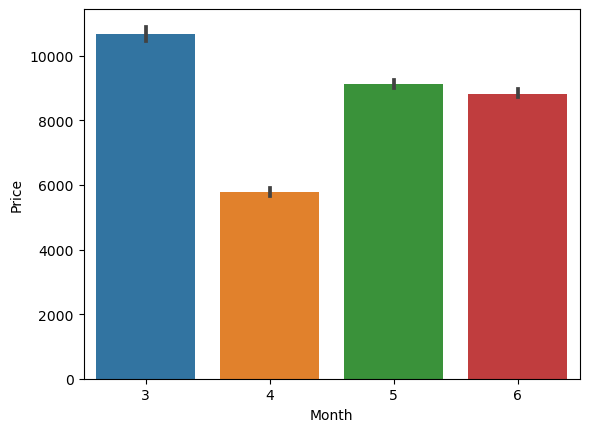

In [582]:
sns.barplot(data=final_df1, x='Month',y='Price')
plt.plot

In [583]:
# most price in 3rd month and low in 4th month

In [584]:
final_df1['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [585]:
final_df1['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [586]:
# so as we can see in destination New Delhi and Delhi being but created two defferet category so we make them same

In [587]:
final_df[final_df['Destination'].isin(['Delhi'])]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
22,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943.0
23,IndiGo,1/05/2019,Banglore,Delhi,BLR → DEL,18:55,21:50,2h 55m,non-stop,No info,4823.0
28,Vistara,18/06/2019,Banglore,Delhi,BLR → DEL,09:45,12:35,2h 50m,non-stop,No info,4668.0
32,IndiGo,6/04/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,4423.0
43,Air Asia,6/05/2019,Banglore,Delhi,BLR → DEL,11:10,13:55,2h 45m,non-stop,No info,3383.0
...,...,...,...,...,...,...,...,...,...,...,...
13308,Air India,1/05/2019,Banglore,Delhi,BLR → DEL,17:00,19:45,2h 45m,non-stop,No info,NaN
13309,Air India,1/06/2019,Banglore,Delhi,BLR → DEL,06:10,08:55,2h 45m,non-stop,No info,NaN
13320,Jet Airways,18/05/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,NaN
13323,IndiGo,24/05/2019,Banglore,Delhi,BLR → DEL,10:10,13:00,2h 50m,non-stop,No info,NaN


In [588]:
final_df[final_df['Destination'].isin(['New Delhi'])]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270.0
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087.0
...,...,...,...,...,...,...,...,...,...,...,...
13284,IndiGo,09/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,2h 55m,non-stop,No info,NaN
13298,Air India,01/03/2019,Banglore,New Delhi,BLR → CCU → GAU → DEL,05:50,18:40,12h 50m,2 stops,No info,NaN
13319,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,21:20,13h 20m,1 stop,No info,NaN
13328,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:55,08:15 13 Mar,9h 20m,1 stop,In-flight meal not included,NaN


In [589]:
final_df1['Destination'].replace('New Delhi','Delhi',inplace=True)

In [590]:
final_df1['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [591]:
final_df1['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [592]:
final_df1[final_df1['Destination'].isin(['New Delhi'])]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year


In [593]:
# so now no records of dublicated value of new delhi

In [594]:
final_df1.groupby('Source').size()

Source
Banglore    2752
Chennai      456
Delhi       5682
Kolkata     3581
Mumbai       883
dtype: int64

In [595]:
final_df1.groupby('Destination').size()

Destination
Banglore     3581
Cochin       5682
Delhi        2752
Hyderabad     883
Kolkata       456
dtype: int64

In [596]:
final_df1.groupby(['Source','Destination']).size()

Source    Destination
Banglore  Delhi          2752
Chennai   Kolkata         456
Delhi     Cochin         5682
Kolkata   Banglore       3581
Mumbai    Hyderabad       883
dtype: int64

In [597]:
# most of flights are going from delhi to cochin

In [598]:
final_df1.groupby(['Source','Destination'])['Price'].mean()

Source    Destination
Banglore  Delhi           8017.464269
Chennai   Kolkata         4789.892388
Delhi     Cochin         10539.439057
Kolkata   Banglore        9158.389411
Mumbai    Hyderabad       5059.708752
Name: Price, dtype: float64

In [599]:
final_df1.groupby(['Source','Destination'])['Price'].max()

Source    Destination
Banglore  Delhi          79512.0
Chennai   Kolkata        19630.0
Delhi     Cochin         52285.0
Kolkata   Banglore       31945.0
Mumbai    Hyderabad      25139.0
Name: Price, dtype: float64

In [600]:
final_df1.groupby(['Source','Destination'])['Price'].min()

Source    Destination
Banglore  Delhi          3257.0
Chennai   Kolkata        3145.0
Delhi     Cochin         3876.0
Kolkata   Banglore       3480.0
Mumbai    Hyderabad      1759.0
Name: Price, dtype: float64

In [601]:
# banglore to Delhi has higest fare while Mumbai to Hyderabad has lowest fare

<Axes: xlabel='Price'>

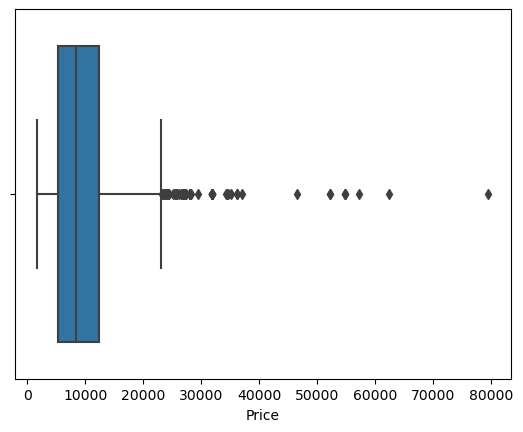

In [602]:
sns.boxplot(x=final_df1['Price'])

C:\Users\Akash Sarnaik\AppData\Local\Temp\ipykernel_33180\3484174739.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df1['Price'])
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

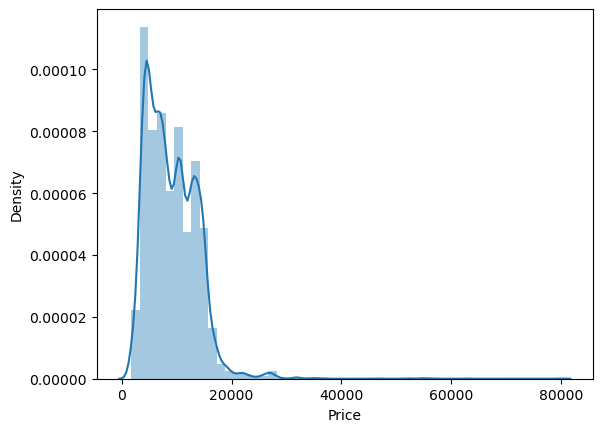

In [603]:
sns.distplot(final_df1['Price'])

In [604]:

final_df1['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [605]:
final_df1['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [606]:
final_df1.groupby('Total_Stops').size().reset_index()

,Total_Stops,0
0,1 stop,7057
1,2 stops,1899
2,3 stops,56
3,4 stops,2
4,non-stop,4340


In [607]:
final_df1.groupby('Total_Stops')['Price'].mean()

Total_Stops
1 stop      10593.570032
2 stops     12715.807895
3 stops     13112.000000
4 stops     17686.000000
non-stop     5024.900315
Name: Price, dtype: float64

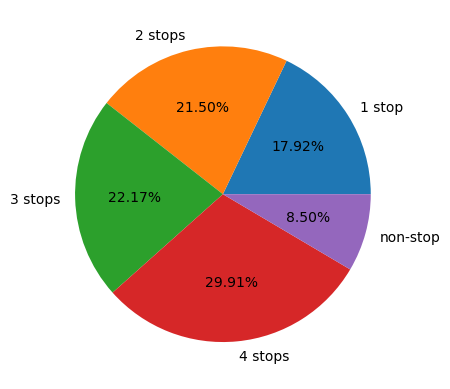

In [608]:
labels=['1 stop','2 stops','3 stops','4 stops','non-stop']
plt.pie(final_df1.groupby('Total_Stops')['Price'].mean(),autopct="%.2f%%",labels=labels)
plt.show()

In [609]:
# as per stops on an average prices are increasing

In [610]:
# no need of roots becoz same info is being convenced through total stops

In [611]:
final_df1.drop('Route',axis=1,inplace=True)

In [612]:
final_df1.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [613]:
final_df1['Duration']

0         2h 50m
1         7h 25m
2            19h
3         5h 25m
4         4h 45m
          ...   
13349    23h 55m
13350     2h 35m
13351     6h 35m
13352    15h 15m
13353    14h 20m
Name: Duration, Length: 13354, dtype: object

In [614]:
final_df1['Duration'].str.split(" ").str[0].str.rstrip("h").astype('int')

ValueError: invalid literal for int() with base 10: '5m'

In [615]:
# there is value with 5m find out and handle it

In [616]:
final_df1[final_df1['Duration']=='5m']

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
6474,Air India,Mumbai,Hyderabad,16:50,16:55,5m,2 stops,No info,17327.0,6,3,2019
13343,Air India,Mumbai,Hyderabad,16:50,16:55,5m,2 stops,No info,NaN,12,3,2019


In [617]:
final_df1.groupby(['Total_Stops','Source','Destination'])['Duration'].max()

Total_Stops  Source    Destination
1 stop       Banglore  Delhi           9h 40m
             Delhi     Cochin           9h 5m
             Kolkata   Banglore         9h 5m
             Mumbai    Hyderabad       8h 50m
2 stops      Banglore  Delhi           9h 35m
             Delhi     Cochin          9h 25m
             Kolkata   Banglore        9h 50m
             Mumbai    Hyderabad        9h 5m
3 stops      Banglore  Delhi          35h 20m
             Delhi     Cochin          9h 25m
             Kolkata   Banglore       35h 15m
             Mumbai    Hyderabad      29h 35m
4 stops      Banglore  Delhi          29h 30m
non-stop     Banglore  Delhi            3h 5m
             Chennai   Kolkata         2h 45m
             Delhi     Cochin           3h 5m
             Kolkata   Banglore        2h 50m
             Mumbai    Hyderabad       1h 35m
Name: Duration, dtype: object

In [618]:
# so as here between 2 stops mubai and hyderabad max duration is 9h 5m so we should replace it

In [619]:
final_df1['Duration'].iloc[6474]='9h 35m'

C:\Users\Akash Sarnaik\AppData\Local\Temp\ipykernel_33180\2948006731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df1['Duration'].iloc[6474]='9h 35m'


In [620]:
final_df1[final_df1['Duration']=='5m']

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
13343,Air India,Mumbai,Hyderabad,16:50,16:55,5m,2 stops,No info,NaN,12,3,2019


In [621]:
final_df1['Duration'].iloc[13343]='9h 35m'

C:\Users\Akash Sarnaik\AppData\Local\Temp\ipykernel_33180\2513644487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df1['Duration'].iloc[13343]='9h 35m'


In [622]:
final_df1[final_df1['Duration']=='5m']

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year


In [623]:
final_df1['Duration'].str.split(" ").str[0].str.rstrip("h").astype('int')*60

0         120
1         420
2        1140
3         300
4         240
         ... 
13349    1380
13350     120
13351     360
13352     900
13353     840
Name: Duration, Length: 13354, dtype: int32

In [624]:
final_df1['Duration'].str.split(" ").str[1].str.strip("m").fillna(0)

0        50
1        25
2         0
3        25
4        45
         ..
13349    55
13350    35
13351    35
13352    15
13353    20
Name: Duration, Length: 13354, dtype: object

In [625]:

final_df1['Total_dur_min']=final_df1['Duration'].str.split(" ").str[0].str.rstrip("h").astype('int')*60 + final_df1['Duration'].str.split(" ").str[1].str.strip("m").fillna(0).astype('int')

In [626]:
final_df1=df.copy()

In [627]:
final_df1.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Total_dur_min
0,IndiGo,Banglore,Delhi,non-stop,No info,3897.0,24,3,2019,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,1,5,2019,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,9,6,2019,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,12,5,2019,325
4,IndiGo,Banglore,Delhi,1 stop,No info,13302.0,1,3,2019,285


In [628]:
# now no need of columns dep time, arrival time duration
final_df1.drop(columns=['Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)

KeyError: "['Dep_Time', 'Arrival_Time', 'Duration'] not found in axis"

In [629]:
final_df1.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Total_dur_min
0,IndiGo,Banglore,Delhi,non-stop,No info,3897.0,24,3,2019,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,1,5,2019,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,9,6,2019,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,12,5,2019,325
4,IndiGo,Banglore,Delhi,1 stop,No info,13302.0,1,3,2019,285


In [630]:
# now  1  columns is left i.e
final_df1['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [631]:
# first replace No info with No Info becoz both are same only dublicated

In [632]:
final_df1['Additional_Info'].replace('No Info','No info',inplace=True)

In [633]:
final_df1['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [634]:
final_df1.to_csv('cleaned_final_df.csv',index=False)


In [635]:
df = pd.read_csv('cleaned_final_df.csv')

In [636]:
final_df1=df.copy()

In [637]:
final_df1

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Total_dur_min
0,IndiGo,Banglore,Delhi,non-stop,No info,3897.0,24,3,2019,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,1,5,2019,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,9,6,2019,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,12,5,2019,325
4,IndiGo,Banglore,Delhi,1 stop,No info,13302.0,1,3,2019,285
...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,1 stop,No info,NaN,6,6,2019,1435
13350,IndiGo,Kolkata,Banglore,non-stop,No info,NaN,27,3,2019,155
13351,Jet Airways,Delhi,Cochin,1 stop,No info,NaN,6,3,2019,395
13352,Air India,Delhi,Cochin,1 stop,No info,NaN,6,3,2019,915


In [638]:
#EDA

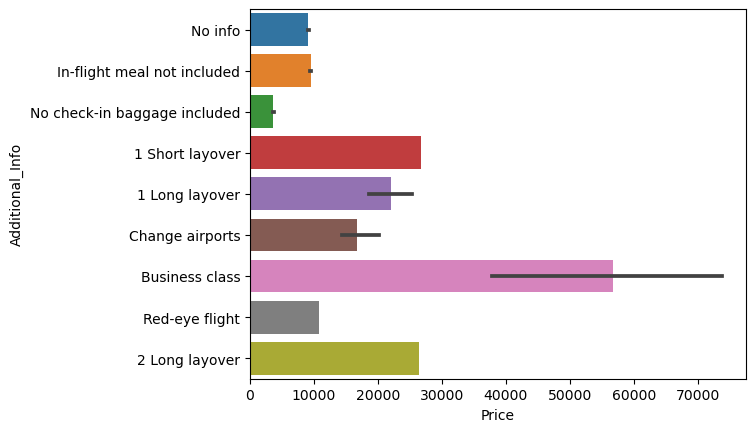

In [639]:
sns.barplot(data=final_df1,y='Additional_Info',x='Price'),
# plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Duration Time in (min)')

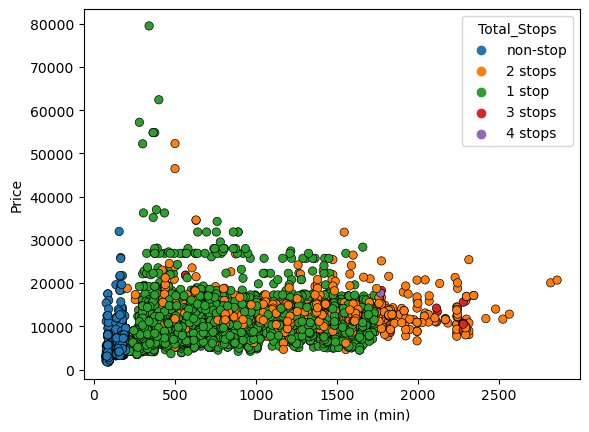

In [640]:
sns.scatterplot(data=final_df1, x='Total_dur_min',y='Price',edgecolor='black',hue='Total_Stops')
plt.xlabel('Duration Time in (min)')

<Axes: xlabel='Total_dur_min', ylabel='Price'>

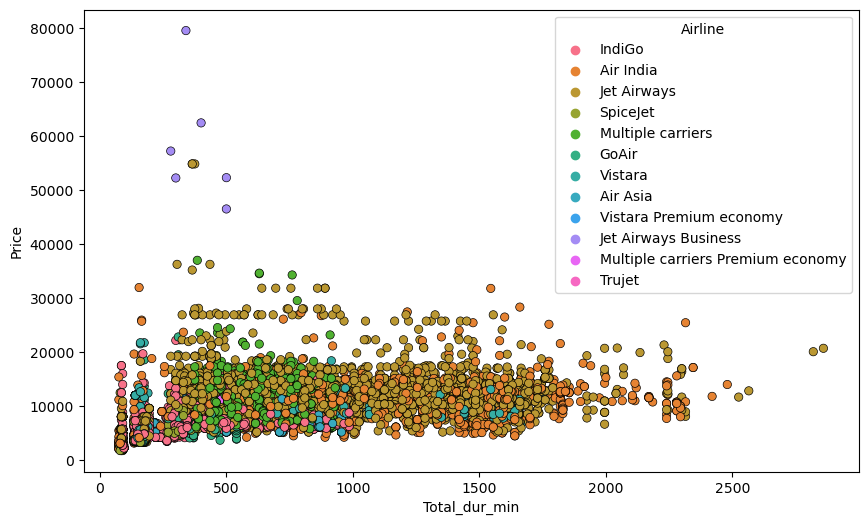

In [641]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=final_df1, x='Total_dur_min',y='Price',edgecolor='black',hue='Airline')


<Axes: xlabel='Total_Stops', ylabel='Total_dur_min'>

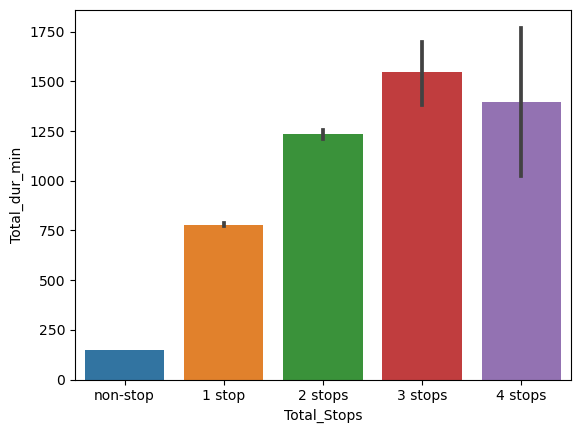

In [642]:
order=['non-stop','1 stop','2 stops','3 stops','4 stops']

sns.barplot(data=final_df1,x='Total_Stops',y='Total_dur_min',order=order)

C:\anaconda\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='Total_Stops', ylabel='Price'>

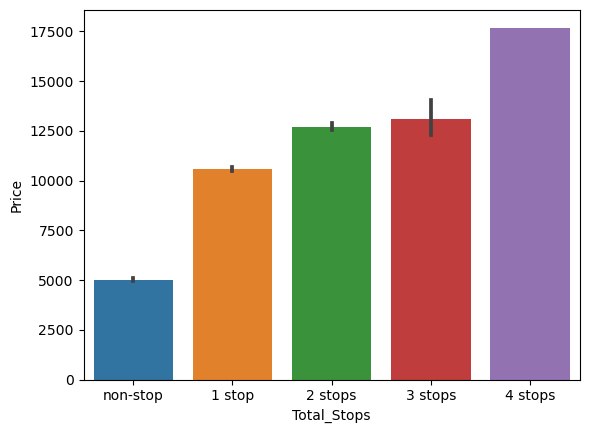

In [643]:
order=['non-stop','1 stop','2 stops','3 stops','4 stops']
sns.barplot(data=final_df1,x='Total_Stops',y='Price',order=order)


In [644]:
# so as per observation most stops flight has high price and goes down as stop decreases

In [645]:
final_df1.groupby("Airline")['Price'].mean().rename("avg_price").reset_index().sort_values('avg_price',ascending=False)

,Airline,avg_price
5,Jet Airways Business,58358.666667
4,Jet Airways,11643.923357
7,Multiple carriers Premium economy,11418.846154
6,Multiple carriers,10902.678094
1,Air India,9611.210616
11,Vistara Premium economy,8962.333333
10,Vistara,7796.348643
2,GoAir,5861.056701
3,IndiGo,5673.682903
0,Air Asia,5590.260188


In [646]:
# Jet Airways Business has most average price among all airlines

In [647]:
final_df1.groupby('Total_Stops').size()


Total_Stops
1 stop      7057
2 stops     1899
3 stops       56
4 stops        2
non-stop    4340
dtype: int64

ValueError: 'label' must be of length 'x'

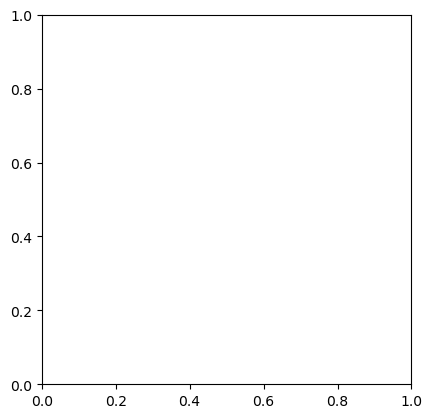

In [648]:

plt.pie(final_df1.groupby('Total_Stops').size(),labels=stops,explode=[0,0,0,0.2,0])
plt.show()

In [ ]:
final_df1[final_df1['Total_Stops']=='4 stops']

In [649]:
final_df1.groupby('Total_Stops')['Airline'].unique().reset_index()

,Total_Stops,Airline
0,1 stop,"[IndiGo, Jet Airways, Multiple carriers, Air I..."
1,2 stops,"[Air India, Jet Airways, Multiple carriers, In..."
2,3 stops,"[Air India, Multiple carriers]"
3,4 stops,[Air India]
4,non-stop,"[IndiGo, SpiceJet, Air India, Vistara, Air Asi..."


In [650]:
one_stop_airlines=final_df1.groupby('Total_Stops')['Airline'].unique().reset_index().iloc[0][1]
one_stop_airlines

C:\Users\Akash Sarnaik\AppData\Local\Temp\ipykernel_33180\2858133479.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  one_stop_airlines=final_df1.groupby('Total_Stops')['Airline'].unique().reset_index().iloc[0][1]


array(['IndiGo', 'Jet Airways', 'Multiple carriers', 'Air India',
       'SpiceJet', 'GoAir', 'Vistara', 'Air Asia', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [651]:
# two stops airline
final_df1.groupby('Total_Stops')['Airline'].unique().reset_index().iloc[1][1]


C:\Users\Akash Sarnaik\AppData\Local\Temp\ipykernel_33180\804144218.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  final_df1.groupby('Total_Stops')['Airline'].unique().reset_index().iloc[1][1]


array(['Air India', 'Jet Airways', 'Multiple carriers', 'IndiGo',
       'Air Asia', 'Jet Airways Business'], dtype=object)

In [652]:
four_stop_airline=final_df1.groupby('Total_Stops')['Airline'].unique().reset_index().iloc[3][1]
four_stop_airline

C:\Users\Akash Sarnaik\AppData\Local\Temp\ipykernel_33180\752311754.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  four_stop_airline=final_df1.groupby('Total_Stops')['Airline'].unique().reset_index().iloc[3][1]


array(['Air India'], dtype=object)

In [653]:
three_stop_airline=final_df1.groupby('Total_Stops')['Airline'].unique().reset_index().iloc[2][1]
three_stop_airline

C:\Users\Akash Sarnaik\AppData\Local\Temp\ipykernel_33180\2802176606.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  three_stop_airline=final_df1.groupby('Total_Stops')['Airline'].unique().reset_index().iloc[2][1]


array(['Air India', 'Multiple carriers'], dtype=object)

In [654]:
# non_stop
final_df1.groupby('Total_Stops')['Airline'].unique().reset_index().iloc[4][1]


C:\Users\Akash Sarnaik\AppData\Local\Temp\ipykernel_33180\3857475614.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  final_df1.groupby('Total_Stops')['Airline'].unique().reset_index().iloc[4][1]


array(['IndiGo', 'SpiceJet', 'Air India', 'Vistara', 'Air Asia',
       'Jet Airways', 'GoAir', 'Vistara Premium economy',
       'Jet Airways Business'], dtype=object)

In [655]:
final_df1['Airline'].unique()


array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [656]:
final_df1

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Total_dur_min
0,IndiGo,Banglore,Delhi,non-stop,No info,3897.0,24,3,2019,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,1,5,2019,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,9,6,2019,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,12,5,2019,325
4,IndiGo,Banglore,Delhi,1 stop,No info,13302.0,1,3,2019,285
...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,1 stop,No info,NaN,6,6,2019,1435
13350,IndiGo,Kolkata,Banglore,non-stop,No info,NaN,27,3,2019,155
13351,Jet Airways,Delhi,Cochin,1 stop,No info,NaN,6,3,2019,395
13352,Air India,Delhi,Cochin,1 stop,No info,NaN,6,3,2019,915


In [657]:
final_df1

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Total_dur_min
0,IndiGo,Banglore,Delhi,non-stop,No info,3897.0,24,3,2019,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,1,5,2019,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,9,6,2019,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,12,5,2019,325
4,IndiGo,Banglore,Delhi,1 stop,No info,13302.0,1,3,2019,285
...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,1 stop,No info,NaN,6,6,2019,1435
13350,IndiGo,Kolkata,Banglore,non-stop,No info,NaN,27,3,2019,155
13351,Jet Airways,Delhi,Cochin,1 stop,No info,NaN,6,3,2019,395
13352,Air India,Delhi,Cochin,1 stop,No info,NaN,6,3,2019,915


In [658]:
final_df2=final_df1.copy()

In [659]:
final_df2.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Total_dur_min
0,IndiGo,Banglore,Delhi,non-stop,No info,3897.0,24,3,2019,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,1,5,2019,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,9,6,2019,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,12,5,2019,325
4,IndiGo,Banglore,Delhi,1 stop,No info,13302.0,1,3,2019,285


In [660]:
final_df2=final_df2.drop(columns=['Year'],axis=1)

In [661]:
final_df2

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Total_dur_min
0,IndiGo,Banglore,Delhi,non-stop,No info,3897.0,24,3,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,1,5,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,9,6,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,12,5,325
4,IndiGo,Banglore,Delhi,1 stop,No info,13302.0,1,3,285
...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,1 stop,No info,NaN,6,6,1435
13350,IndiGo,Kolkata,Banglore,non-stop,No info,NaN,27,3,155
13351,Jet Airways,Delhi,Cochin,1 stop,No info,NaN,6,3,395
13352,Air India,Delhi,Cochin,1 stop,No info,NaN,6,3,915


In [662]:
final_df2=pd.get_dummies(final_df2,columns=['Airline','Additional_Info','Source','Destination','Total_Stops'],dtype='int')

In [663]:
test_df=final_df2[final_df2['Price'].isnull()]

In [664]:
train_df=final_df2[~final_df2['Price'].isnull()]

In [665]:
x=train_df.drop('Price',axis=1)

In [666]:
y=train_df['Price']

In [667]:
x

,Day,Month,Total_dur_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,24,3,170,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,5,445,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,9,6,1140,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,12,5,325,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,3,285,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9,4,150,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
10679,27,4,155,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
10680,27,4,180,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
10681,1,3,160,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [668]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10683, dtype: float64

In [669]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=10)

In [670]:
x_train

,Day,Month,Total_dur_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
8450,9,3,160,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
637,27,4,170,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9938,6,3,1580,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
8830,27,4,155,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4509,1,6,145,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,1,3,1045,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
7291,6,6,730,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1344,21,6,170,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7293,15,3,625,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [671]:
x_test

,Day,Month,Total_dur_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
2389,12,6,730,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
5411,15,5,1365,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2674,6,6,1080,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
970,21,3,555,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5845,9,3,675,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,6,6,380,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
7639,3,6,415,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
860,3,3,165,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9115,15,5,330,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [672]:
y_train

8450     4148.0
637      5228.0
9938     9190.0
8830     3841.0
4509     3540.0
         ...   
9372    22270.0
7291    14848.0
1344     4823.0
7293     9134.0
1289    12192.0
Name: Price, Length: 8546, dtype: float64

In [673]:
y_test

2389     6224.0
5411    14151.0
2674    10539.0
970      7934.0
5845    16754.0
         ...   
3727     6938.0
7639     6628.0
860      6144.0
9115     7804.0
8102     3597.0
Name: Price, Length: 2137, dtype: float64

In [674]:
from sklearn.linear_model import LinearRegression

In [675]:
le=LinearRegression()

In [676]:
le.fit(x_train,y_train)

LinearRegression()

In [677]:
y_pred=le.predict(x_test)
y_pred

array([ 9426.75909129, 13425.33763835,  9859.60887463, ...,
        5987.86704125,  7196.24735723,  4396.49122842])

In [678]:
le.score(x_test,y_test)

0.6339594648039999

In [679]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score,r2_score

In [680]:
import math

In [681]:
print("MAE: ", mean_absolute_error(y_test,y_pred))
print("MSE: ", mean_squared_error(y_test,y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test,y_pred)))

MAE:  1835.1203404077448
MSE:  7989149.417464357
RMSE:  2826.5083437811318


In [715]:
from sklearn.ensemble import RandomForestRegressor

In [716]:
rfr = RandomForestRegressor()

In [717]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [718]:
y_pred=rfr.predict(x_test)

In [719]:
rfr.score(x_test,y_test)

0.8203832250294429

In [720]:
pickle.dump(rfr,open('model_rfr.pkl','wb'))

In [722]:
model1= pickle.load(open('model_rfr.pkl','rb'))

In [723]:
model1.predict(x_test)

array([ 8754.34      , 13833.01      , 10614.92      , ...,
        6544.39454545,  8432.35066667,  3837.22      ])

In [702]:
import math

In [703]:
print("MAE: ", mean_absolute_error(y_test,y_pred))
print("MSE: ", mean_squared_error(y_test,y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test,y_pred)))

MAE:  894.6834739145897
MSE:  3939605.011940472
RMSE:  1984.8438255793508


In [704]:
from sklearn.model_selection import RandomizedSearchCV

In [705]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [706]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [707]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [708]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.7s


C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.7s


C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.6s


C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.6s


C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.8s


C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   6.7s


C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   6.7s


C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.2s


C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.0s


C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   6.7s


C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  11.0s


C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  10.3s


C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  10.8s


C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  10.3s


C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  10.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  14.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  14.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  14.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  14.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  14.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.8s
[CV] END max_depth=5, max_feat

C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  12.4s


C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  12.4s


C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  12.6s


C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  17.3s


C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  27.1s


C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [709]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [710]:
rfr = RandomForestRegressor(n_estimators= 700,
 min_samples_split= 15,
 min_samples_leaf= 1,
 max_features='auto',
 max_depth= 20
)

In [711]:
rfr.fit(x_train,y_train)

C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=20, max_features='auto', min_samples_split=15,
                      n_estimators=700)

In [712]:
y_pred = rfr.predict(x_test)

In [713]:
r2_score(y_test,y_pred)

0.8245081416817657

In [714]:
pickle.dump(rfr,open('model_rfr.pkl','wb'))

In [682]:
from xgboost import XGBRegressor

In [683]:
model = XGBRegressor()

In [684]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [685]:
y_pred = model.predict(x_test)

In [686]:
print("Accuracy: ", model.score(x_test,y_test))
print("MAE: ", mean_absolute_error(y_test,y_pred))
print("MSE: ", mean_squared_error(y_test,y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test,y_pred)))

Accuracy:  0.8380608928323334
MAE:  906.7980753104711
MSE:  3534460.2558853417
RMSE:  1880.016025433119


In [687]:
import pickle

In [688]:
pickle.dump(model,open('flight_price_model.pkl','wb'))

In [689]:
model = pickle.load(open('flight_price_model.pkl','rb'))

In [572]:
test_df=test_df.drop('Price',axis=1)

In [573]:
test_df

,Day,Month,Total_dur_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
10683,6,6,655,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10684,12,5,240,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10685,21,5,1425,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10686,21,5,780,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
10687,24,6,170,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,6,6,1435,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13350,27,3,155,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
13351,6,3,395,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13352,6,3,915,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [574]:
y_pred=model.predict(test_df)

In [575]:
y_pred

array([14916.888 ,  4617.8794, 12507.935 , ..., 16715.318 , 13536.589 ,
        8359.861 ], dtype=float32)

In [578]:
final_df1

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Total_dur_min
0,IndiGo,Banglore,Delhi,non-stop,No info,3897.0,24,3,2019,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,1,5,2019,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,9,6,2019,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,12,5,2019,325
4,IndiGo,Banglore,Delhi,1 stop,No info,13302.0,1,3,2019,285
...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,1 stop,No info,NaN,6,6,2019,1435
13350,IndiGo,Kolkata,Banglore,non-stop,No info,NaN,27,3,2019,155
13351,Jet Airways,Delhi,Cochin,1 stop,No info,NaN,6,3,2019,395
13352,Air India,Delhi,Cochin,1 stop,No info,NaN,6,3,2019,915


In [581]:
pickle.dump(final_df1,open('flight_df.pkl','wb'))

In [582]:
df = pickle.load(open('flight_df.pkl','rb'))

In [530]:
df1=pd.read_csv('cleaned_final_df.csv')

In [531]:
# df1.drop(['Arrival_Time','Dep_Time','Duration','Year','Price'],axis=1,inplace=True)

In [532]:
df1

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Total_dur_min
0,IndiGo,Banglore,Delhi,non-stop,No info,3897.0,24,3,2019,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,1,5,2019,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,9,6,2019,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218.0,12,5,2019,325
4,IndiGo,Banglore,Delhi,1 stop,No info,13302.0,1,3,2019,285
...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,1 stop,No info,NaN,6,6,2019,1435
13350,IndiGo,Kolkata,Banglore,non-stop,No info,NaN,27,3,2019,155
13351,Jet Airways,Delhi,Cochin,1 stop,No info,NaN,6,3,2019,395
13352,Air India,Delhi,Cochin,1 stop,No info,NaN,6,3,2019,915


In [533]:
from sklearn.preprocessing import OneHotEncoder

In [534]:
ohe = OneHotEncoder()

In [536]:
airline_encoder=ohe.fit(df1[['Airline']])

In [380]:
airline_values=ohe.transform(df1[['Airline']]).toarray()
airline_values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [381]:
columns=ohe.categories_

In [382]:
columns

[array(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
        'Jet Airways Business', 'Multiple carriers',
        'Multiple carriers Premium economy', 'SpiceJet', 'Trujet',
        'Vistara', 'Vistara Premium economy'], dtype=object)]

In [383]:
airlines_df=pd.DataFrame(airline_values,columns=columns)

In [384]:
df1.drop('Airline',axis=1,inplace=True)

In [385]:
df1=pd.concat([df1,airlines_df],axis=1)

In [484]:
df1

,Airline,Total_Stops,Additional_Info,Price,Day,Month,Year,Total_dur_min,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata
0,IndiGo,non-stop,No info,3897.0,24,3,2019,170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Air India,2 stops,No info,7662.0,1,5,2019,445,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Jet Airways,2 stops,No info,13882.0,9,6,2019,1140,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,IndiGo,1 stop,No info,6218.0,12,5,2019,325,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,IndiGo,1 stop,No info,13302.0,1,3,2019,285,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,1 stop,No info,NaN,6,6,2019,1435,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
13350,IndiGo,non-stop,No info,NaN,27,3,2019,155,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
13351,Jet Airways,1 stop,No info,NaN,6,3,2019,395,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13352,Air India,1 stop,No info,NaN,6,3,2019,915,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [486]:
source_destination_encoder=ohe.fit(df1[['Source','Destination']])

In [487]:
source_destination_vals=ohe.transform(df1[['Source','Destination']]).toarray()


In [438]:
source_destination_vals

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [439]:
import numpy as np

In [440]:
source_destination_encoder.categories_

[array(['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype=object),
 array(['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata'],
       dtype=object)]

In [441]:
source_dest_cat =np.array(source_destination_encoder.categories_).ravel()
source_dest_cat

array(['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Banglore',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata'], dtype=object)

In [442]:
source_dest_df=pd.DataFrame(source_destination_vals,columns=source_dest_cat)

In [443]:
source_dest_df

,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
13349,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
13350,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
13351,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13352,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [444]:
df1.drop(['Source','Destination'],axis=1, inplace=True)

In [445]:
df1

,Airline,Total_Stops,Additional_Info,Price,Day,Month,Year,Total_dur_min
0,IndiGo,non-stop,No info,3897.0,24,3,2019,170
1,Air India,2 stops,No info,7662.0,1,5,2019,445
2,Jet Airways,2 stops,No info,13882.0,9,6,2019,1140
3,IndiGo,1 stop,No info,6218.0,12,5,2019,325
4,IndiGo,1 stop,No info,13302.0,1,3,2019,285
...,...,...,...,...,...,...,...,...
13349,Air India,1 stop,No info,NaN,6,6,2019,1435
13350,IndiGo,non-stop,No info,NaN,27,3,2019,155
13351,Jet Airways,1 stop,No info,NaN,6,3,2019,395
13352,Air India,1 stop,No info,NaN,6,3,2019,915


In [446]:
df1=pd.concat([df1,source_dest_df],axis=1)

In [459]:
stops_encoder=ohe.fit(df1[['Total_Stops']])

In [460]:
stops_vals = ohe.transform(df1[['Total_Stops']]).toarray()

In [461]:
stops_vals

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [462]:
stops_encoder.categories_

[array(['1 stop', '2 stops', '3 stops', '4 stops', 'non-stop'],
       dtype=object)]

In [402]:
stops_encoder_cat = np.array(stops_encoder.categories_).ravel()

In [403]:
stops_encoder_cat

array(['1 stop', '2 stops', '3 stops', '4 stops', 'non-stop'],
      dtype=object)

In [404]:
stops=pd.DataFrame(stops_addinfo_encoder_vals,columns=stops_addinfo_encoder_cats)

In [405]:
stops

,1 stop,2 stops,3 stops,4 stops,non-stop
0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
13349,1.0,0.0,0.0,0.0,0.0
13350,0.0,0.0,0.0,0.0,1.0
13351,1.0,0.0,0.0,0.0,0.0
13352,1.0,0.0,0.0,0.0,0.0


In [406]:
df1.drop('Total_Stops',axis=1,inplace=True)

In [407]:
df1=pd.concat([df1,stops],axis=1)

In [408]:
df1

,Additional_Info,Price,Day,Month,Year,Total_dur_min,"(Air Asia,)","(Air India,)","(GoAir,)","(IndiGo,)",...,Banglore,Cochin,Delhi,Hyderabad,Kolkata,1 stop,2 stops,3 stops,4 stops,non-stop
0,No info,3897.0,24,3,2019,170,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,No info,7662.0,1,5,2019,445,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,No info,13882.0,9,6,2019,1140,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,No info,6218.0,12,5,2019,325,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,No info,13302.0,1,3,2019,285,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,No info,NaN,6,6,2019,1435,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13350,No info,NaN,27,3,2019,155,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13351,No info,NaN,6,3,2019,395,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13352,No info,NaN,6,3,2019,915,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [409]:
add_info_encoder=ohe.fit(df1[['Additional_Info']])

In [410]:
add_info_vals = ohe.transform(df1[['Additional_Info']]).toarray()

In [411]:
add_info_vals

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [412]:
add_info_encoder.categories_

[array(['1 Long layover', '1 Short layover', '2 Long layover',
        'Business class', 'Change airports', 'In-flight meal not included',
        'No check-in baggage included', 'No info', 'Red-eye flight'],
       dtype=object)]

In [413]:
add_info_cat = np.array(add_info_encoder.categories_).ravel()

In [414]:
add_info_cat

array(['1 Long layover', '1 Short layover', '2 Long layover',
       'Business class', 'Change airports', 'In-flight meal not included',
       'No check-in baggage included', 'No info', 'Red-eye flight'],
      dtype=object)

In [415]:
add_info_df=pd.DataFrame(add_info_vals,columns=add_info_cat)

In [416]:
df1.drop('Additional_Info',axis=1,inplace=True)

In [417]:
df1

,Price,Day,Month,Year,Total_dur_min,"(Air Asia,)","(Air India,)","(GoAir,)","(IndiGo,)","(Jet Airways,)",...,Banglore,Cochin,Delhi,Hyderabad,Kolkata,1 stop,2 stops,3 stops,4 stops,non-stop
0,3897.0,24,3,2019,170,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,7662.0,1,5,2019,445,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,13882.0,9,6,2019,1140,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,6218.0,12,5,2019,325,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,13302.0,1,3,2019,285,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,NaN,6,6,2019,1435,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13350,NaN,27,3,2019,155,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13351,NaN,6,3,2019,395,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13352,NaN,6,3,2019,915,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [418]:
df1=pd.concat([df1,add_info_df],axis=1)

In [419]:
df1

,Price,Day,Month,Year,Total_dur_min,"(Air Asia,)","(Air India,)","(GoAir,)","(IndiGo,)","(Jet Airways,)",...,non-stop,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No check-in baggage included,No info,Red-eye flight
0,3897.0,24,3,2019,170,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7662.0,1,5,2019,445,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,13882.0,9,6,2019,1140,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6218.0,12,5,2019,325,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,13302.0,1,3,2019,285,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,NaN,6,6,2019,1435,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13350,NaN,27,3,2019,155,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13351,NaN,6,3,2019,395,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13352,NaN,6,3,2019,915,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [432]:
import pickle

In [433]:
pickle.dump(airline_encoder,open('airline_encoder.pkl','wb'))

In [434]:
airline_encoder = pickle.load(open('airline_encoder.pkl','rb'))

In [514]:
df1=airline_encoder.transform([['IndiGo']]).toarray()

C:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [488]:
pickle.dump(source_destination_encoder,open('source_destination_encoder.pkl','wb'))

In [463]:
pickle.dump(stops_encoder,open('stops_encoder.pkl','wb'))

In [449]:
pickle.dump(add_info_encoder,open('add_info_encoder.pkl','wb'))

In [489]:
source_dest_en = pickle.load(open('source_destination_encoder.pkl','rb'))

In [495]:
df2=source_destination_encoder.transform([['Banglore','Delhi']]).toarray()

C:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [491]:
stops_encoder = pickle.load(open('stops_encoder.pkl','rb'))

In [496]:
df3=stops_encoder.transform([['non-stop']]).toarray()

C:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [493]:
add_info_encoder = pickle.load(open('add_info_encoder.pkl','rb'))

In [497]:
df4=add_info_encoder.transform([['No info']]).toarray()

C:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [20]:
import pickle

In [22]:
airline_encoder = pickle.load(open('airline_encoder.pkl','rb'))
source_destination_encoder = pickle.load(open('source_destination_encoder.pkl','rb'))
stops_encoder = pickle.load(open('stops_encoder.pkl','rb'))
add_info_encoder = pickle.load(open('add_info_encoder.pkl','rb'))
model = pickle.load(open('flight_price_model.pkl','rb'))

In [29]:
day =24
Month =3
hour=2
minutes=50
airline='IndiGo'
source='Banglore'
destination='Delhi'
total_stops='non-stop'
additional_info = 'No info'


In [30]:
import numpy as np

In [31]:


hour=int(hour)
minutes=int(minutes)

total_duration=hour*60 + minutes
day_month_duration = np.array([[day,Month,total_duration]])

airline_array=airline_encoder.transform([[airline]]).toarray()
    
source_destination_array=source_destination_encoder.transform([[source,destination]]).toarray()

stops_array=stops_encoder.transform([[total_stops]]).toarray()

add_info_array=add_info_encoder.transform([[additional_info]]).toarray()

test=np.concatenate((day_month_duration,airline_array,source_destination_array,stops_array,add_info_array),axis=1)

C:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [32]:
test

array([[ 24.,   3., 170.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.]])

In [34]:
result=model.predict(test)

In [37]:
result=result[0]

In [38]:
result

3388.4424